# 데이터 집계와 시각화

### 목차

1. 범주형 변수의 요약과 시각화 : nuique, value_counts, countplot 
2. 수치형 변수의 집계값과 분포 그래프 : describe, np.mean, np.std, histplot, quantile, boxplot  
3. 두 범주형 변수의 관계 탐색 : crosstab, heatmap
4. 두 수치형 변수의 관계 : scatterplot, corr
5. 범주형 변수와 수치형 변수의 관계 : groupby, histplot-hue, pivot_table



### 목표 
1. 집계값을 계산할 수 있다.
2. 적절한 그래프를 작성하고 올바르게 해석할 수 있다.

<hr>
<br>

## 라이브러리 불러오기 

In [1]:
import numpy as np
import pandas as pd

# 그래프 라이브러리
import seaborn as sns 
import matplotlib.pyplot as plt

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

## 예제 및 실습 데이터 불러오기

In [2]:
# 보험 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')

print(df_ins.shape)
df_ins.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# 성적 데이터 불러오기
df_sp = pd.read_csv('data/StudentsPerformance.csv')

print(df_sp.shape)
df_sp.head()

(1000, 9)


,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [4]:
# 데이터프레임에서 수치형 변수들의 기초통계량 확인(데이터 수, 평균, 표준편차, 최소값, 1분위수, 2분위수, 3분위수)
df_sp.describe()

,Unnamed: 0,math_score,reading_score,writing_score
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,66.08900,69.169000,68.054000
std,288.819436,15.16308,14.600192,15.195657
min,0.000000,0.00000,17.000000,10.000000
25%,249.750000,57.00000,59.000000,57.750000
50%,499.500000,66.00000,70.000000,69.000000
75%,749.250000,77.00000,79.000000,79.000000
max,999.000000,100.00000,100.000000,100.000000


<br>

# 1. 범주형 변수의 요약과 시각화  

In [5]:
# 수준(levels) 목록 확인
df_ins['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [6]:
# 수준(levels) 개수 확인 
df_ins['smoker'].nunique()

2

<br>

### 1.1. 수준별 관측치 수 계산 

In [7]:
# 수준별 관측치 수 세기
df_ins['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64


### 1.2. 수준별 관측치 수 막대그래프


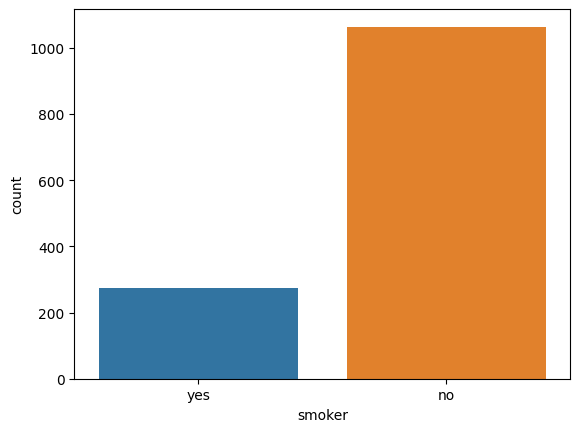

In [8]:
# seaborn을 활용한 막대그래프
sns.countplot(data=df_ins, x='smoker')

plt.show()


<br>

#### [실습]

1. 데이터 df_sp에서 'parental level of education'의 수준 목록 확인하기 
2. 데이터 df_sp에서 'parental level of education'의 수준별 관측치 수 계산하기
3. 데이터 df_sp에서 'parental level of education'의 수준별 관측치 수 막대그래프 그리기

In [9]:
df_sp.head(1)

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,0,female,group B,bachelor's degree,standard,none,72,72,74


In [10]:
# 1. 데이터 df_sp에서 'parental level of education'의 수준 목록 확인하기
df_sp['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
# 2. 데이터 df_sp에서 'parental level of education'의 수준별 관측치 수 계산하기
df_sp['parental level of education'].value_counts()


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

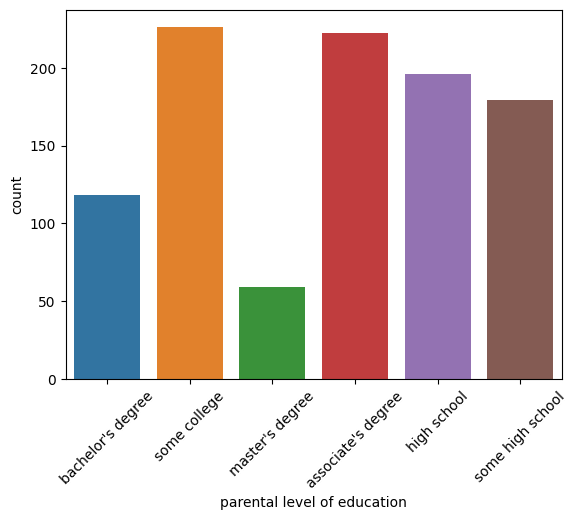

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt

# 3. 데이터 df_sp에서 'parental level of education'의 수준별 관측치 수 막대그래프 그리기
sns.countplot(data=df_sp, x='parental level of education')

# x축 눈금 레이블 회전
plt.xticks(rotation=45)

plt.show()

<br>
<br>
<br>

# 2. 수치형 변수의 집계값과 분포 그래프

수치형 변수로 합계, 평균 등 집계값 계산  
히스토그램이나 상자그림 그래프를 그려보자


<br>

### 2.1. 수치형 변수의 집계값 계산


In [63]:
df_ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [64]:
# 관심변수 선택
df_ins['charges']  # 보험료

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [65]:
# 평균
df_ins['charges'].mean()

13270.422265141257

In [66]:
# 합계
df_ins['charges'].sum()

17755824.990759

In [67]:
# 분산
df_ins['charges'].var()

146652372.1528548

In [68]:
# 표준편차
df_ins['charges'].std()

12110.011236693994

In [69]:
# 관측치 수
df_ins['charges'].count()

1338

#### 2.1.1. numpy를 활용한 집계값 계산

In [70]:
np.sum(df_ins['charges'])

17755824.990759

In [71]:
np.mean(df_ins['charges'])

13270.422265141257

In [72]:
np.var(df_ins['charges'])

146542766.49354774

In [73]:
np.std(df_ins['charges'], ddof=1)

12110.011236693994

In [74]:
np.std(df_ins['charges'], ddof=0)**2

146542766.49354777

In [75]:
# 참고 : ddof(degrees of freedom ; 자유도) 
# ddof=1인 경우, 표본표준편차를 계산합니다. (ddof=0은 모집단만큼의 큰 표본 데이터일 때 사용) 
# 이는 모집단을 대표할 만큼 충분한 크기가 아닌 작은 표본 데이터를 사용할 경우에 적용됩니다. 
# 일반적으로 데이터 분석에서는 ddof=1을 사용합니다. 

<br>

### 2.2. 히스토그램

수치형 변수의 분포 파악


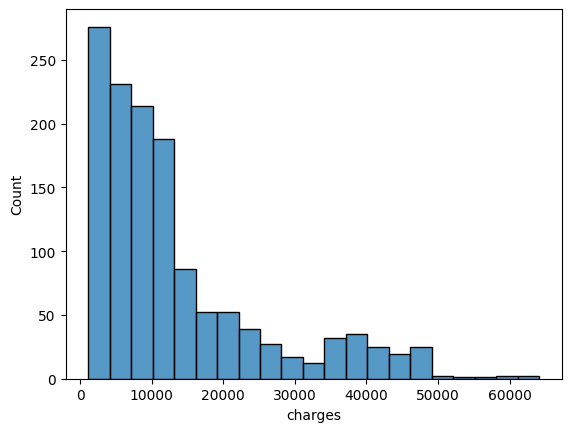

In [76]:
# histplot()을 활용한 히스토그램
sns.histplot(data=df_ins, x='charges', binwidth=3000)  # binwidth
plt.show()

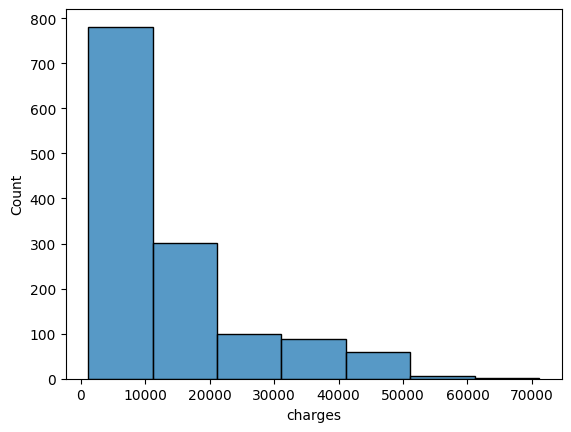

In [159]:
# 히스토그램의 binwidth 바꿔보기
sns.histplot(data=df_ins, x='charges', binwidth=10000)  # binwidth
plt.show()

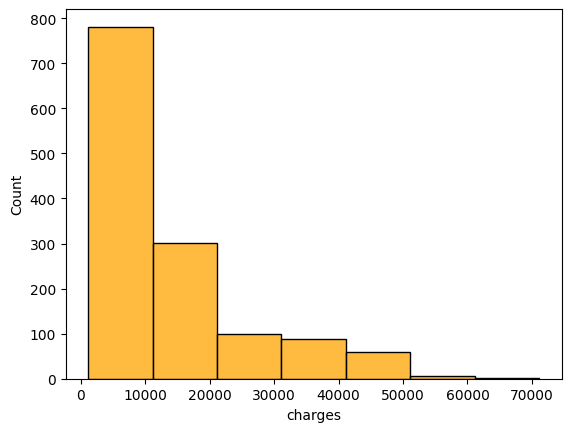

In [166]:
# 히스토그램의 color 바꿔보기 
sns.histplot(data=df_ins, x='charges', binwidth=10000, color='orange')  # binwidth, color 
plt.show()

<br>

#### [실습] 한 수치형 변수에 대한 요약과 시각화

1. df_sp에서 'math_score'의 평균 계산하기
2. df_sp에서 'math_score'의 히스토그램 그려기
3. df_sp에서 'reading_score'로 1~2. 반복하기



In [78]:
df_sp.head(1)

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,0,female,group B,bachelor's degree,standard,none,72,72,74


In [13]:
# 1. df_sp에서 'math_score'의 평균 계산하기
np.mean(df_sp['math_score'])

66.089

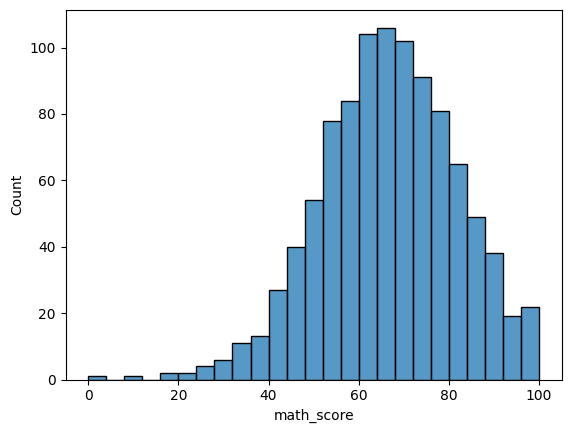

In [14]:
# 2. df_sp에서 'math_score'의 히스토그램 그려기
sns.histplot(data=df_sp, x='math_score')
plt.show()

<br>


### 2.3. 분위수와 상자그림

`quantile()`을 활용해서 분위수 계산 가능  

사분위수(quartile)를 계산하고 상자그림(boxplot)으로 분포 확인
* 최솟값(minimum, 0%)
* Q1(1st Quartile, 25%)
* Q2, 중앙값(median, 50%)
* Q3(3rd Quartile, 75%)
* 최댓값(maximum, 100%) 

In [81]:
# 대표적인 3가지 순서통계량
print(df_ins['charges'].min())
print(df_ins['charges'].median())
print(df_ins['charges'].max())

1121.8739
9382.033
63770.42801


In [82]:
# 분위수 계산
# quantile : 특정 비율에 위치한 값
df_ins['charges'].quantile(0.1)

2346.5336150000003

In [83]:
# charges의 사분위수 계산
df_ins['charges'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])

0.00     1121.873900
0.25     4740.287150
0.50     9382.033000
0.75    16639.912515
1.00    63770.428010
Name: charges, dtype: float64

In [84]:
# age의 사분위수 계산
df_ins['age'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])

0.00    18.0
0.25    27.0
0.50    39.0
0.75    51.0
1.00    64.0
Name: age, dtype: float64

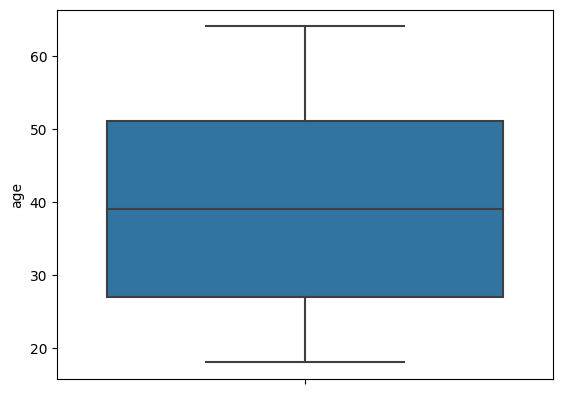

In [85]:
# boxplot()을 활용한 age 상자그림
sns.boxplot(data=df_ins, y='age')
plt.show()

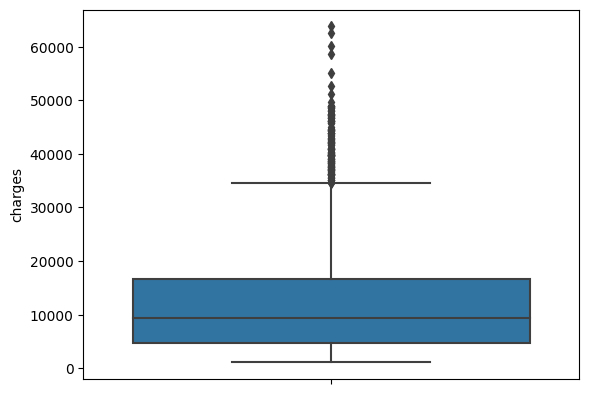

In [86]:
# boxplot()을 활용한 charges의 상자그림과 이상치
sns.boxplot(data=df_ins, y='charges')
plt.show()

<br>


#### [실습]

1. df_sp에서 'reading_score'의 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
2. df_sp에서 'reading_score'의 상자그림 그리기

In [17]:
df_sp.columns

Index(['Unnamed: 0', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [19]:
# 1. df_sp에서 'reading_score'의 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
df_sp['reading_score'].quantile(0.25)

59.0

In [20]:
df_sp['reading_score'].quantile(0.5)

70.0

In [21]:
df_sp['reading_score'].quantile(0.75)

79.0

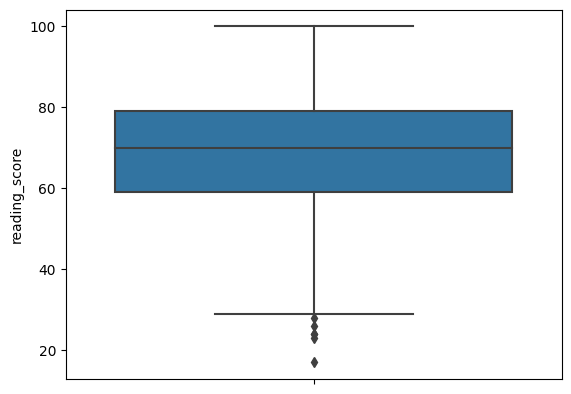

In [24]:
# 2. df_sp에서 'reading_score'의 상자그림 그리기
sns.boxplot(data=df_sp, y='reading_score')
plt.show()

<br>
<br>

## [실습] reading_score 이상치 데이터 추출 실습

IQR 구하고 이상치 기준 정한 후 데이터프레임 조건식 활용해서 이상치 데이터 추출하기

In [27]:
Q1 = df_sp['reading_score'].quantile(0.25)
Q1

59.0

In [28]:
Q3 = df_sp['reading_score'].quantile(0.75)
Q3

79.0

In [29]:
IQR = Q3 - Q1
IQR

20.0

In [30]:
# 이상치(reading score) 기준
outlier = Q1 - IQR*1.5 
outlier

29.0

In [32]:
# outlier 조건
df_sp['reading_score'] <= 29

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: reading_score, Length: 1000, dtype: bool

In [35]:
# 이상치 기준으로 이상치 데이터 추출하기
# df[df_조건]
df_outlier = df_sp[  df_sp['reading_score'] <= outlier  ]  # 이상치 이하인 값들만 뽑아오기
df_outlier

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
59,59,female,group C,some high school,free/reduced,none,0,17,10
76,76,male,group E,some high school,standard,none,30,26,22
211,211,male,group C,some college,free/reduced,none,35,28,27
327,327,male,group A,some college,free/reduced,none,28,23,19
596,596,male,group B,high school,free/reduced,none,30,24,15
601,601,female,group C,high school,standard,none,29,29,30
896,896,male,group B,high school,free/reduced,none,36,29,27
980,980,female,group B,high school,free/reduced,none,8,24,23


In [37]:
# 이상치 데이터 인덱스들만 뽑아보기
df_outlier.index

Int64Index([59, 76, 211, 327, 596, 601, 896, 980], dtype='int64')

<br>
<br>
<br>

# 3. 두 범주형 변수의 관계 탐색

두 범주형 변수의 관계 탐색   
- `crosstab()`으로 **교차표**를 만들고,   
- **열지도(heatmap)**를 활용해서 시각화


<br>

### 3.1. 교차표 생성과 열지도 그리기


In [97]:
# crosstab()을 활용한 교차표 생성 : 성별 흡연자 빈도는 어떻게 될까?
tab1 = pd.crosstab(df_ins['sex'], df_ins['smoker'])
tab1

smoker,no,yes
sex,,
female,547,115
male,517,159


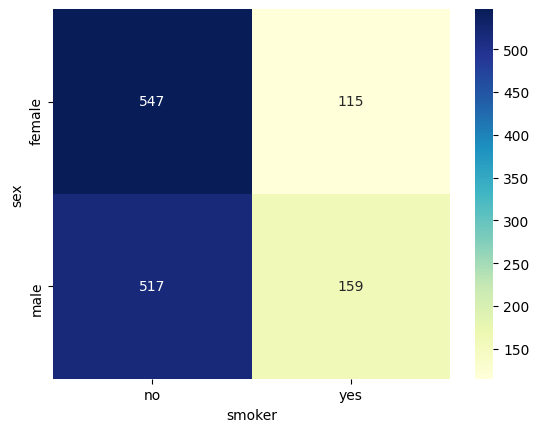

In [98]:
# 열지도 시각화
sns.heatmap(tab1, cmap='YlGnBu', annot=True, fmt='d')
plt.show();

# cmap : 색상 조합
# annot=True : 수치 출력 여부
# fmt : 수치 출력 형식, 'd' 정수, '.2f' 소수점 둘째자리 소수

* 참고: [Color Palette](https://seaborn.pydata.org/tutorial/color_palettes.html)

<br>

*crosstab( )*에서 `margins=True` 옵션을 활용하면 행 합계, 열 합계, 전체 합계 한번에 계산 가능

In [99]:
# crosstab()을 활용한 교차표 생성
tab1m = pd.crosstab(df_ins['sex'], df_ins['smoker'], margins=True)
tab1m

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


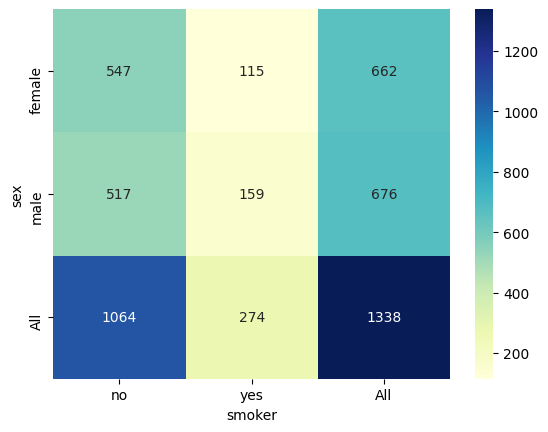

In [100]:
# 열지도 시각화
sns.heatmap(tab1m, cmap='YlGnBu', annot=True, fmt='d')
plt.show();

<br>

### 3.2. 행백분율과 열백분율의 계산과 열지도 그리기

두 범주형 변수의 상대적인 비율 구하기  
`normalize=` 옵션을 활용해서 교차표에서 비율 계산 가능 

* `normalize='all'`: 전체 중 각 셀 비중
* `normalize='index'`: 행 백분율(행 합계 중 각 셀의 비중)
* `normalize='columns'`: 열 백분율(열 합계 중 각 셀의 비중)


In [101]:
# 전체 백분율
# normalize : '정규화'
tab1_all = pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='all')

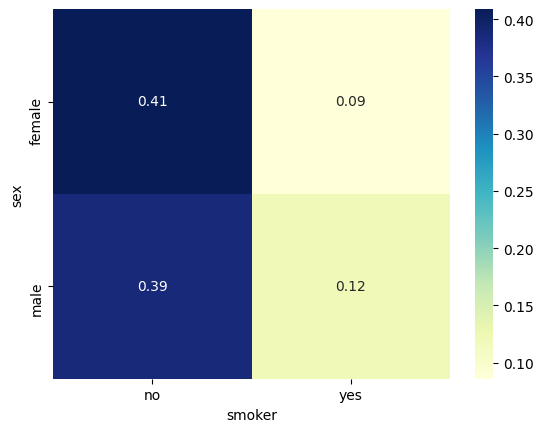

In [102]:
sns.heatmap(tab1_all, cmap='YlGnBu', annot=True, fmt='.2f')

plt.show();

In [103]:
# 행백분율
# normalize='index'
tab1_idx = pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='index')
tab1_idx

smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764793,0.235207


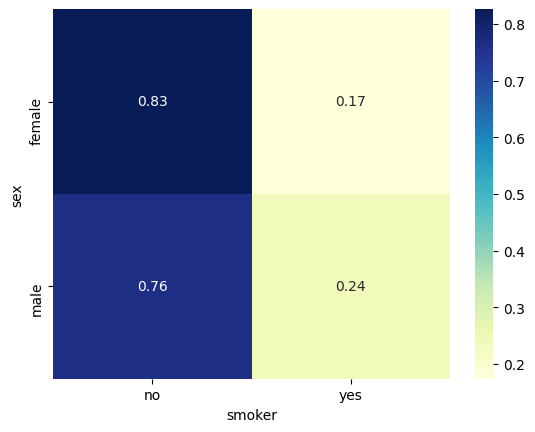

In [104]:
# 행백분율 히트맵
sns.heatmap(tab1_idx, cmap='YlGnBu', annot=True, fmt='.2f')

plt.show();

In [105]:
# 열백분율
# normalize='index'
tab1_col = pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='columns')
tab1_col

smoker,no,yes
sex,,
female,0.514098,0.419708
male,0.485902,0.580292


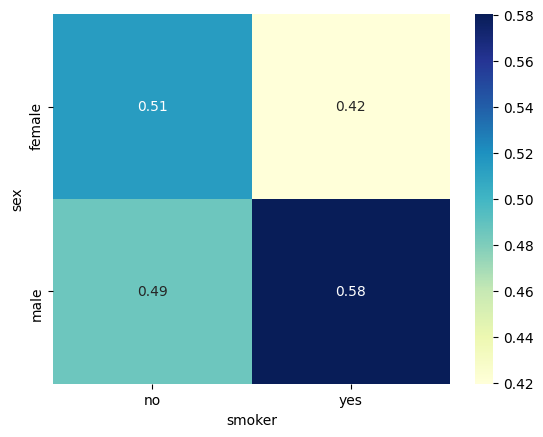

In [106]:
# 열백분율 히트맵
sns.heatmap(tab1_col, cmap='YlGnBu', annot=True, fmt='.2f')
plt.show();

In [107]:
# 전체 비율을 추가한 열백분율
# margins=True
tab1_col = pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='columns', margins=True)
tab1_col

smoker,no,yes,All
sex,,,
female,0.514098,0.419708,0.494768
male,0.485902,0.580292,0.505232


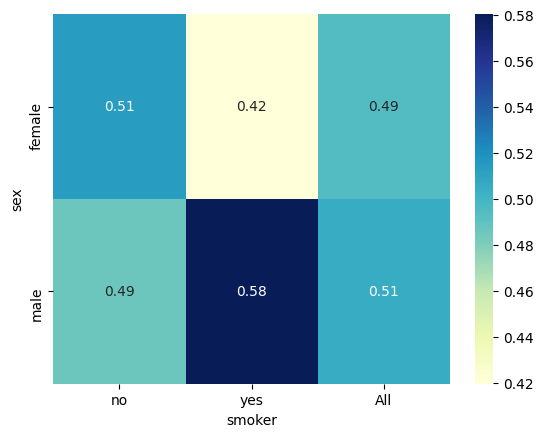

In [108]:
# 열백분율 히트맵
sns.heatmap(tab1_col, cmap='YlGnBu', annot=True, fmt='.2f')

plt.show();

#### [실습] 두 범주형 변수의 관계 탐색

1. df_sp에서 'race/ethnicity'와 'parental level of education'의 교차표 만들기
2. 1.의 교차표에 margin 추가하기
3. 1.의 교차표를 seaborn의 heatmap( )으로 열지도로 시각화하기
4. 2.의 교차표에서 행 백분율, 열 백분율 계산하고 시각화 하기
5. 'race/ethnicity'와 'parental level of education'의 관계 해석하기

In [2]:
df_sp.head(1)

In [38]:
# 1. crosstab()을 활용한 교차표 생성
tab2 = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'])
tab2

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,14,12,18,3,18,24
group B,41,20,48,6,37,38
group C,78,40,64,19,69,49
group D,50,28,44,23,67,50
group E,39,18,22,8,35,18


In [39]:
# 2. margin=True
tab2m = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'], margins=True)
tab2m

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,All
race/ethnicity,,,,,,,
group A,14,12,18,3,18,24,89
group B,41,20,48,6,37,38,190
group C,78,40,64,19,69,49,319
group D,50,28,44,23,67,50,262
group E,39,18,22,8,35,18,140
All,222,118,196,59,226,179,1000


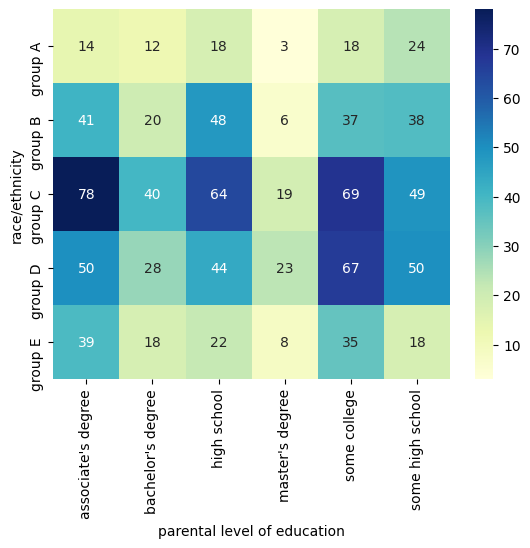

In [42]:
# 3. 1.의 교차표를 seaborn의 heatmap( )으로 열지도로 시각화하기
sns.heatmap(tab2, cmap='YlGnBu', annot=True, fmt='.0f')
plt.show();

In [41]:
# 4-1. 2.의 교차표에서 행 백분율 계산하고 시각화 하기
tab2_idx = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'], 
                       normalize='index')
tab2_idx

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,0.157303,0.134831,0.202247,0.033708,0.202247,0.269663
group B,0.215789,0.105263,0.252632,0.031579,0.194737,0.200000
group C,0.244514,0.125392,0.200627,0.059561,0.216301,0.153605
group D,0.190840,0.106870,0.167939,0.087786,0.255725,0.190840
group E,0.278571,0.128571,0.157143,0.057143,0.250000,0.128571


In [44]:
# 4-2. 2.의 교차표에서 열 백분율 계산하고 시각화 하기
tab2_col = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'], 
                       normalize='columns')
tab2_col

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,0.063063,0.101695,0.091837,0.050847,0.079646,0.134078
group B,0.184685,0.169492,0.244898,0.101695,0.163717,0.212291
group C,0.351351,0.338983,0.326531,0.322034,0.305310,0.273743
group D,0.225225,0.237288,0.224490,0.389831,0.296460,0.279330
group E,0.175676,0.152542,0.112245,0.135593,0.154867,0.100559


<br>
<br>
<br>

# 4. 두 수치형 변수의 관계 

두 수치형 변수의 관계는 **산점도(scatterplot)**를 그리고 **상관계수(correlation coefficient)**로 확인

In [116]:
# 아빠키와 아들키 데이터 불러오기
df_heights = pd.read_csv('data/heights.csv')

print(df_heights.shape)
df_heights.head()

(1078, 2)


,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070


<br>

### 4.1. 산점도 그리기 

### 아빠키와 아들키의 산점도와 추세선 그리기

In [117]:
# 각 변수 평균 계산
mean_f = df_heights['father'].mean()
mean_s = df_heights['son'].mean()

print(mean_f)
print(mean_s)

171.92522603599258
174.45753692820037


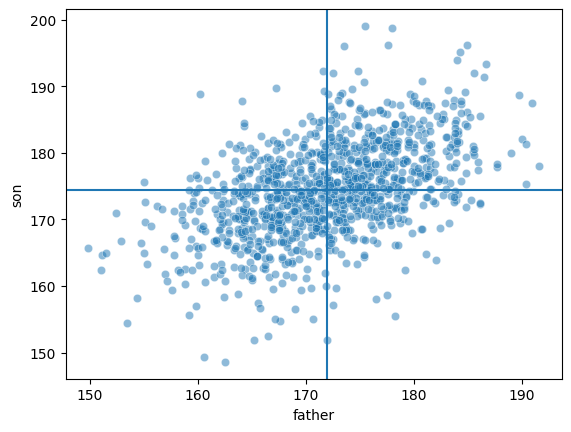

In [118]:
# seaborn으로 산점도 그리기
plot_ = sns.scatterplot(data=df_heights, 
                        x='father', 
                        y='son', 
                        alpha=0.5)
plot_.axhline(mean_s) # 수평선 추가
plot_.axvline(mean_f) # 수직선 추가
plot_

plt.show();

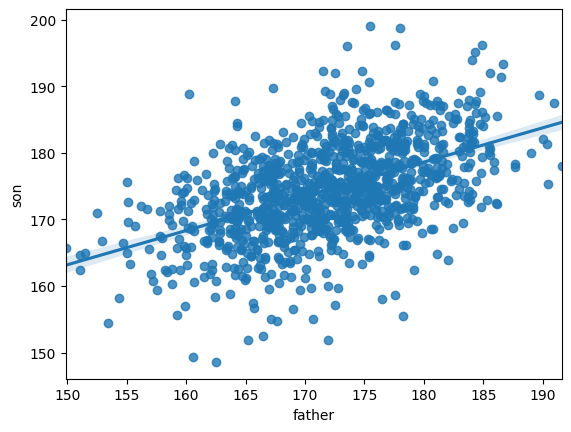

In [119]:
# 추세선 그리기 : regplot() 함수
sns.regplot(x='father', y='son', data=df_heights)
plt.show()

In [120]:
# 기울기와 절편 확인
z = np.polyfit(df_heights['father'], df_heights['son'], 1)
z   # 기울기는 0.51,  절편은 86.07

array([ 0.51409304, 86.07197506])

In [121]:
# 선형 회귀
# 아빠키와 아들키의 회귀식
x = 170
y = 0.51*x + 86

y

172.7

<br>

### 4.2. 공분산과 상관계수

### 아빠키와 아들키의 상관계수

In [170]:
# 아빠키와 아들키의 공분산
df_heights.cov()

,father,son
father,48.608307,24.989192
son,24.989192,51.113092


In [171]:
# 변수 간 상관계수 matrix 구하기
df_heights.corr()

,father,son
father,1.000000,0.501338
son,0.501338,1.000000


In [172]:
df_heights.corr().iloc[0, 1]

0.5013383111723431

### 공부시간과 점수의 상관계수

In [173]:
import numpy as np
import pandas as pd

# 다음 두 변수(공부시간, 점수)의 상관계수 구하기
x = [0, 4, 3, 6, 6, 7, 8, 8, 3]
y = [60, 78, 83, 74, 100, 80, 90, 85, 70]

In [174]:
# 방법1. numpy 함수로 상관계수 구하기
corr_np = np.corrcoef(x, y)[0, 1]
print(corr_np)

0.7011677154273752


In [175]:
# 방법2. 데이터를 데이터프레임으로 만든 후에 pandas 함수로 상관계수 구하기
df = pd.DataFrame({"x": x, "y": y})
df

,x,y
0,0,60
1,4,78
2,3,83
3,6,74
4,6,100
5,7,80
6,8,90
7,8,85
8,3,70


In [176]:
corr_pd = df.corr()
corr_pd

,x,y
x,1.000000,0.701168
y,0.701168,1.000000


In [177]:
# 상관계수
corr_pd.iloc[0, 1]  # iloc를 이용하면 데이터프레임의 특정 인덱스의 값만 뽑아낼 수 있다.

0.7011677154273749

<br>

#### [실습] 두 수치형 변수의 관계 탐색
 
1. **df_sp**에서 'math_score'와 'reading_score'의 산점도를 그리기
2. 1.의 그래프에 두 변수의 평균을 활용해서 수직선, 수평선 추가하기
3. 1.의 두 변수의 상관계수 계산하기
4. **df_ins**에서 bmi와 charges의 산점도를 그리고 상관계수 계산하기
5. df_ins에서 smoker별 분할 데이터를 생성하고, smoker별 분할 데이터로 bmi와 charges의 상관계수를 나눠 계산하기

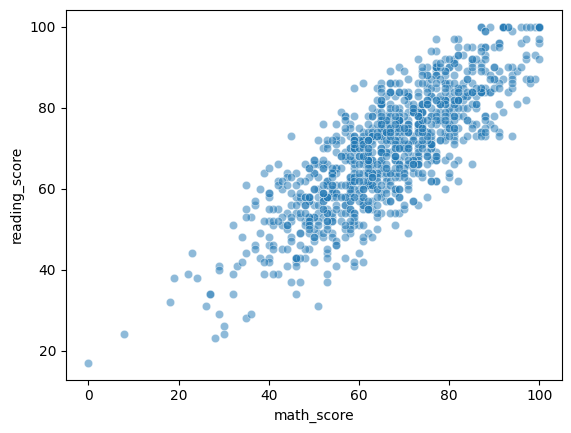

In [46]:
# 1. **df_sp**에서 'math_score'와 'reading_score'의 산점도를 그리기
plot_ = sns.scatterplot(data=df_sp, 
                        x='math_score', 
                        y='reading_score', 
                        alpha=0.5)
# plot_.axhline(mean_r) # 수평선 추가
# plot_.axvline(mean_m) # 수직선 추가
plt.show();

In [49]:
# 각 변수 평균 계산
mean_m = df_sp['math_score'].mean()
mean_r = df_sp['reading_score'].mean()
mean_m, mean_r

(66.089, 69.169)

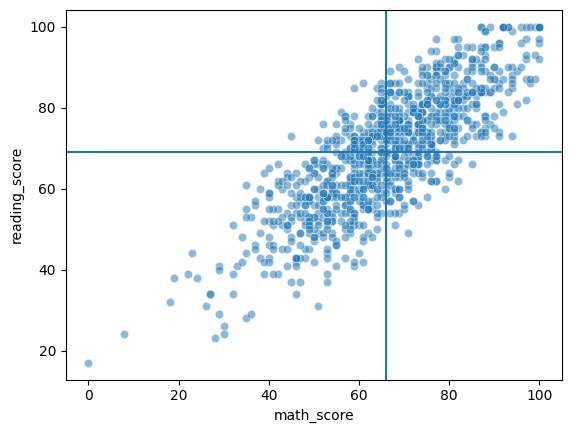

In [51]:
# 2. 1.의 그래프에 두 변수의 평균을 활용해서 수직선, 수평선 추가하기
plot_ = sns.scatterplot(data=df_sp, 
                        x='math_score', 
                        y='reading_score', 
                        alpha=0.5)
plot_.axhline(mean_r) # 수평선 추가
plot_.axvline(mean_m) # 수직선 추가
plt.show();

In [52]:
# 3. 1.의 두 변수의 상관계수 계산하기

# 상관계수 계산하기
df_sp[['math_score','reading_score']].corr()

,math_score,reading_score
math_score,1.00000,0.81758
reading_score,0.81758,1.00000


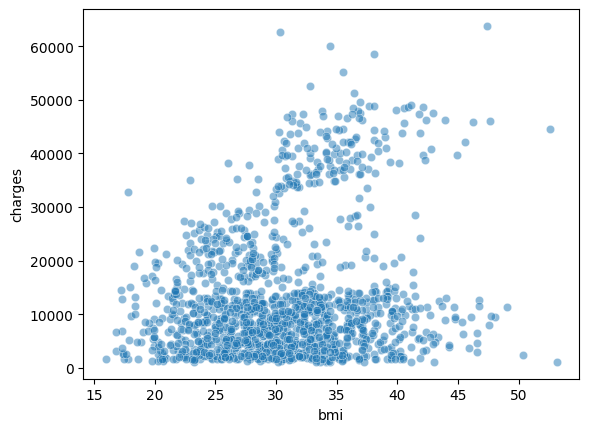

In [55]:
# 4. df_ins 에서 bmi 와 charges 의 산점도를 그리고 상관계수 계산하기
plot_ = sns.scatterplot(data=df_ins, 
                        x='bmi', 
                        y='charges', 
                        alpha=0.5)
# plot_.axhline(mean_c) # 수평선 추가
# plot_.axvline(mean_b) # 수직선 추가
plt.show();

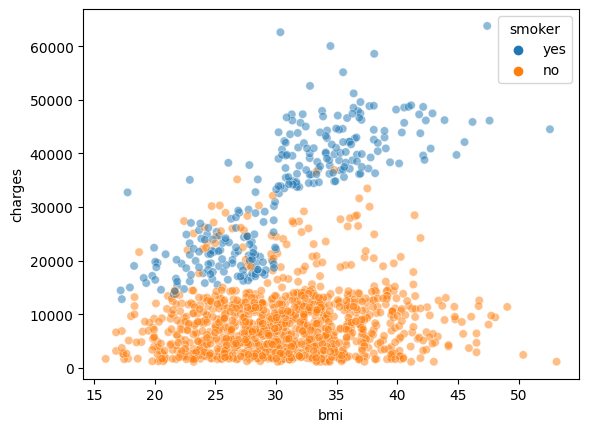

In [56]:
# smoker 분류에 따른 bmi와 charge의 산점도
plot_ = sns.scatterplot(data=df_ins, 
                        x='bmi', 
                        y='charges', 
                        alpha=0.5, 
                        hue = 'smoker')
# plot_.axhline(mean_c) # 수평선 추가
# plot_.axvline(mean_b) # 수직선 추가
plt.show();

In [58]:
# 5. df_ins에서 smoker별 분할 데이터를 생성하고, smoker별 분할 데이터로 bmi와 charges의 상관계수를 나눠 계산하기
df_ins_smoker = df_ins[df_ins['smoker'] == 'yes']
df_ins_nonsmoker = df_ins[df_ins['smoker'] == 'no']

In [59]:
# 상관계수 계산하기 -> 흡연자일수록 bmi와 보험료 간 상관관계가 높다.
df_ins_smoker[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.806481
charges,0.806481,1.000000


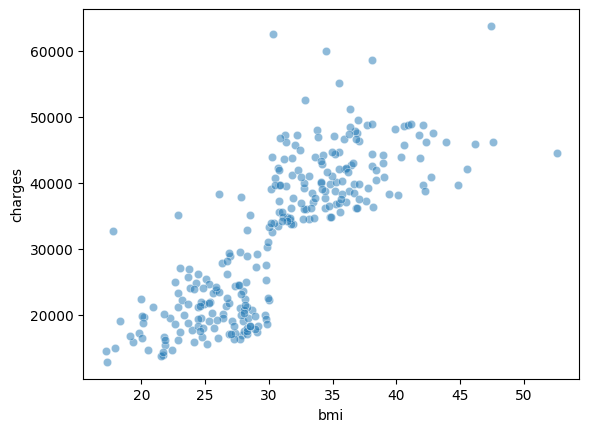

In [60]:
# 산점도 그래프로 확인해보자.
plot_ = sns.scatterplot(data=df_ins_smoker, 
                        x='bmi', 
                        y='charges', 
                        alpha=0.5)
# plot_.axhline(mean_c) # 수평선 추가
# plot_.axvline(mean_b) # 수직선 추가
plot_
plt.show();

In [62]:
# 비흡연자의 상관계수 계산하기 => 비흡연자는 bmi와 charges 간 상관관계가 거의 없다.
df_ins_nonsmoker[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.084037
charges,0.084037,1.000000


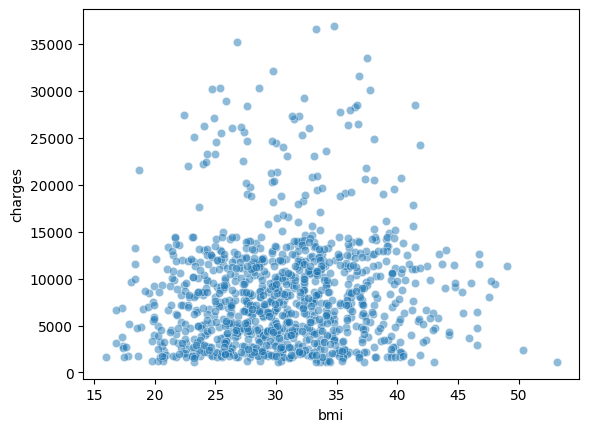

In [63]:
# 산점도 그래프로 확인해보자.
plot_ = sns.scatterplot(data=df_ins_nonsmoker, 
                        x='bmi', 
                        y='charges', 
                        alpha=0.5)
# plot_.axhline(mean_c) # 수평선 추가
# plot_.axvline(mean_b) # 수직선 추가
plot_
plt.show();

### End of Scripts

<br>
<br>
<br>


# 5. 범주형 변수와 수치형 변수의 관계

범주형 변수 그룹 별 평균을 계산하고, 상자그림을 그려서 비교해보자  
`groupby()`로 그룹핑 후 집계함수(sum, mean 등) 적용

<br>

### 5.1. 그룹별 집계값의 계산

In [141]:
# 한 수치형 변수의 평균 계산
df_ins['charges'].mean()

13270.422265141257

In [142]:
# 그룹별 평균 계산
# as_index=False 옵션 : 해당 변수가 index로 사용 안되도록.
df_ins.groupby('sex', as_index=False)['charges'].mean()

,sex,charges
0,female,12569.578844
1,male,13956.751178


<br>

### 5.2. 그래프를 활용한 그룹별 분포 비교

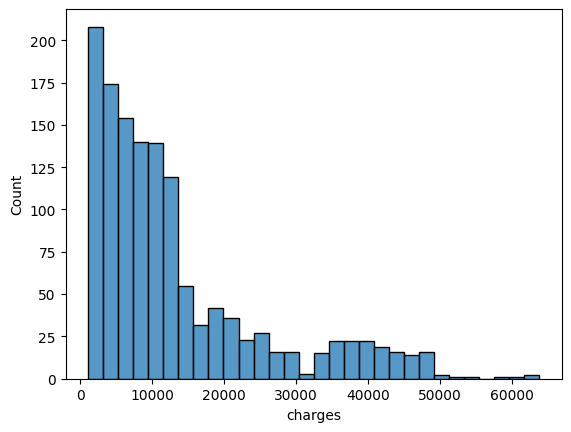

In [143]:
# charges의 히스토그램 
sns.histplot(data=df_ins, x='charges')
plt.show();

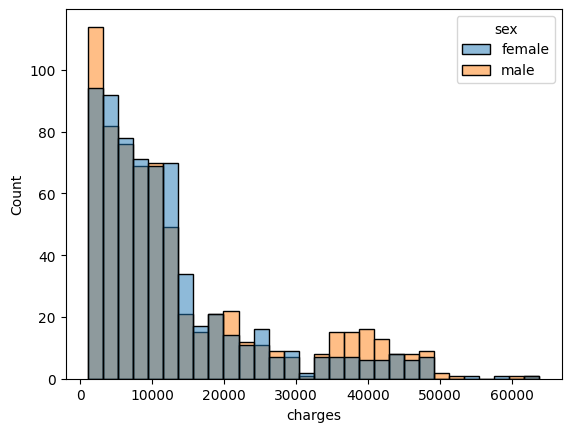

In [144]:
# 성별 구분 추가한 charges 히스토그램 
sns.histplot(data=df_ins, 
             x='charges', 
             hue='sex') 
plt.show();

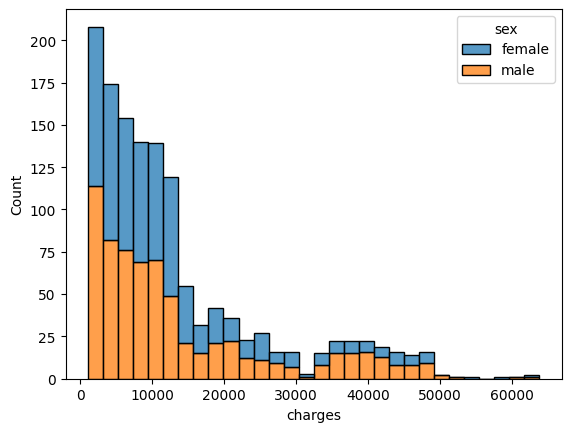

In [145]:
# 성별 구분(stack 적용)한 charges 히스토그램 
# multiple='stack' : 수준(level) 별 누적으로  그래프 표현
sns.histplot(data=df_ins, 
             x='charges',
             hue='sex', 
             multiple='stack') 
plt.show();

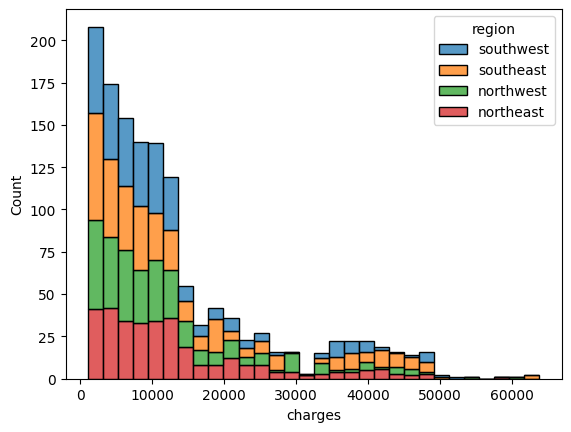

In [146]:
# region 별 charges 분포
sns.histplot(data=df_ins, 
             x='charges',
             hue='region', 
             multiple='stack')

plt.show();

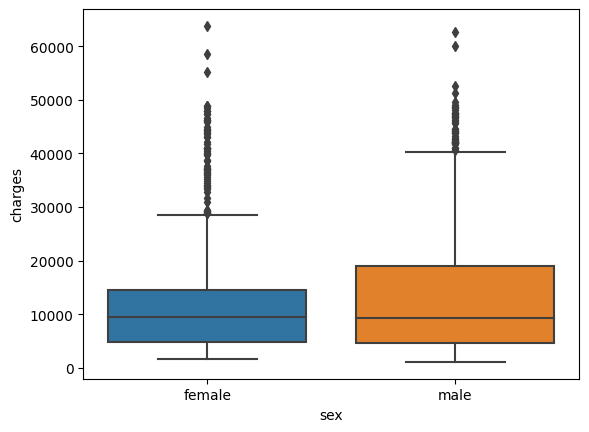

In [147]:
# 상자그림으로 그룹별 분포 비교 가능
sns.boxplot(data=df_ins,
            x='sex', 
            y='charges')

plt.show();

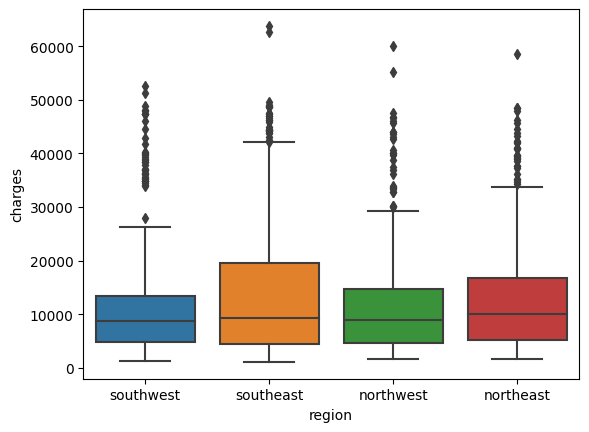

In [148]:
# 지역별 상자그림
sns.boxplot(data=df_ins,
            x='region', 
            y='charges')
plt.show();

<br>
<br>

#### [실습] 변수 관계 탐색

1. 데이터 df_sp에서 `gender`별 `math_score`의 평균을 계산하기 
2. 1의 두 변수를 활용해서 히스토그램과 상자그림 그리기
3. 데이터 df_sp에서 `parental level of education`별 `reading_score`의 평균 계산하기
4. 3의 두 변수를 활용해서 히스토그램과 상자그림 그리기



In [149]:
df_sp.head()

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


<br>
<br>
<br>
<br>

### (참고) 피벗 테이블 활용

In [156]:
# pivot_table()을 활용한 피벗 테이블 : 데이터의 행,열을 새롭게 설정하여 원하는 값 확인

# Q.성별 보험료 평균값이 가장 높은 지역은 어디일까?
agg = df_ins.pivot_table(index='sex', columns='region', values='charges', aggfunc='mean')
agg

# index  : 행 그룹변수
# columns: 열 그룹변수 
# values : 값 변수
# aggfunc: 집계 함수

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


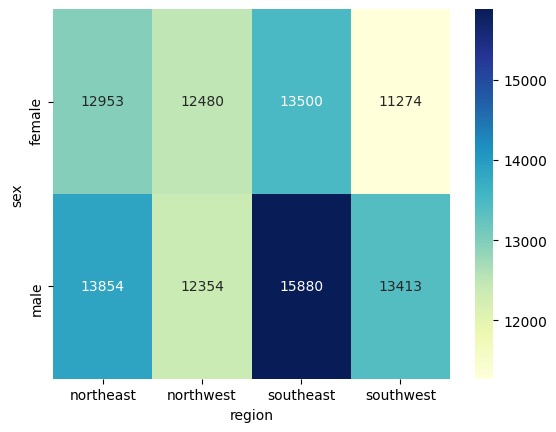

In [157]:
# 교차표 그린것 히트맵 그리기
sns.heatmap(agg, cmap='YlGnBu', annot=True, fmt='.0f')
plt.show();

In [158]:
# Q.성별 보험료 평균값이 가장 높은 지역은 어디일까?
# A. southeast에 사는 남성의 평균 보험료가 가장 높다.

#### End of script